In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('corn_data.csv')

In [3]:
data

,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,...,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
0,TAITA TAVETA,fmr_65,Certificate,Male,36-45,7,corn,2.00,50,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.46,38.35
1,TAITA TAVETA,fmr_77,Certificate,Male,36-45,7,corn,0.25,50,2,...,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.31,38.40
2,TAITA TAVETA,fmr_89,Certificate,Male,36-45,7,corn,3.00,251,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.41,38.37
3,TAITA TAVETA,fmr_102,Certificate,Male,36-45,7,corn,1.50,300,3,...,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.39,38.37
4,TAITA TAVETA,fmr_25,Certificate,Male,46-55,3,corn,NaN,50,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.39,38.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,TAITA TAVETA,fmr_176,NaN,Male,46-55,6,corn,0.50,50,3,...,Rain,Credit groups,No,No,Extension services,County Government,Phone Calls,Kiswahili,-3.47,38.59
418,TAITA TAVETA,fmr_349,NaN,Female,46-55,7,corn,1.00,25,3,...,Rain,Savings,No,No,Public gatherings,Private Provider,Phone Calls,Kiswahili,-3.48,38.59
419,TAITA TAVETA,fmr_97,NaN,Female,46-55,6,corn,NaN,50,2,...,Rain,Credit groups,No,No,Radio,County Government,Phone Calls,Kiswahili,-3.41,38.35
420,TAITA TAVETA,fmr_188,NaN,Male,46-55,6,corn,0.75,25,3,...,Rain,Credit groups,No,No,Radio,County Government,Phone Calls,Kiswahili,-3.56,38.60


In [4]:
data.fillna(0,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   County                422 non-null    object 
 1   Farmer                422 non-null    object 
 2   Education             422 non-null    object 
 3   Gender                422 non-null    object 
 4   Age bracket           422 non-null    object 
 5   Household size        422 non-null    int64  
 6   Crop                  422 non-null    object 
 7   Acreage               422 non-null    float64
 8   Fertilizer amount     422 non-null    int64  
 9   Laborers              422 non-null    int64  
 10  Yield                 422 non-null    int64  
 11  Power source          422 non-null    object 
 12  Water source          422 non-null    object 
 13  Main credit source    422 non-null    object 
 14  Crop insurance        422 non-null    object 
 15  Farm records          4

<Axes: xlabel='Acreage', ylabel='Fertilizer amount'>

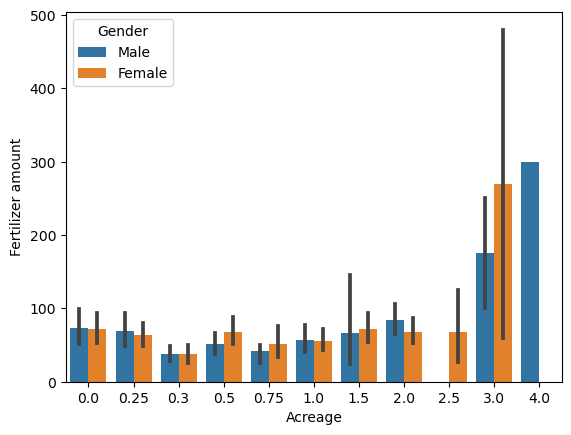

In [6]:
sns.barplot(data, y='Fertilizer amount', x='Acreage', hue='Gender')

<Axes: xlabel='Acreage', ylabel='Fertilizer amount'>

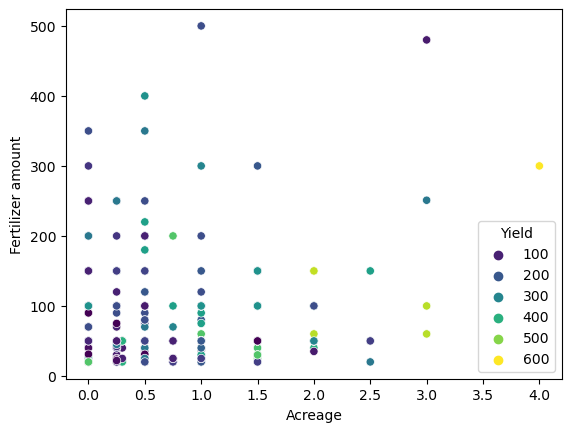

In [7]:
sns.scatterplot(data, y='Fertilizer amount', x='Acreage', hue='Yield',palette='viridis')

In [8]:
data['Age bracket'].value_counts()

36-45       132
46-55       110
18-35        90
56-65        70
above 65     20
Name: Age bracket, dtype: int64

<Axes: xlabel='Household size', ylabel='Acreage'>

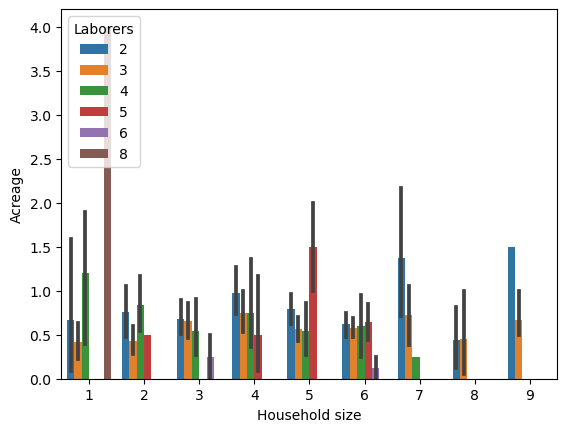

In [9]:
sns.barplot(data, y='Acreage',x='Household size', hue='Laborers')

In [10]:
features = data[['Gender','Age bracket','Household size','Acreage','Fertilizer amount','Laborers','Yield']]

In [11]:
features

,Gender,Age bracket,Household size,Acreage,Fertilizer amount,Laborers,Yield
0,Male,36-45,7,2.00,50,2,300
1,Male,36-45,7,0.25,50,2,270
2,Male,36-45,7,3.00,251,2,270
3,Male,36-45,7,1.50,300,3,200
4,Male,46-55,3,0.00,50,2,180
...,...,...,...,...,...,...,...
417,Male,46-55,6,0.50,50,3,160
418,Female,46-55,7,1.00,25,3,150
419,Female,46-55,6,0.00,50,2,110
420,Male,46-55,6,0.75,25,3,100


In [12]:
features.corr()

,Household size,Acreage,Fertilizer amount,Laborers,Yield
Household size,1.000000,-0.026289,-0.018736,-0.052347,0.131874
Acreage,-0.026289,1.000000,0.124556,-0.050158,0.408733
Fertilizer amount,-0.018736,0.124556,1.000000,0.055668,0.038664
Laborers,-0.052347,-0.050158,0.055668,1.000000,-0.031047
Yield,0.131874,0.408733,0.038664,-0.031047,1.000000


In [13]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [14]:
encoder = OrdinalEncoder()

In [15]:
X = features.drop('Yield', axis=1)

In [16]:
y = features['Yield']

In [17]:
X_trans = encoder.fit_transform(X)

In [18]:
y_econ = LabelEncoder()

In [19]:
y_trans = y_econ.fit_transform(y)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.33, random_state=42)

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
model = lm.predict(X_test)

In [25]:
model = pd.DataFrame(model, columns=['Predicted yield'])

In [26]:
model

,Predicted yield
0,13.942322
1,22.163775
2,14.878490
3,13.650172
4,14.241851
...,...
135,13.635693
136,21.700549
137,7.574647
138,13.862557


In [27]:
y_test = pd.DataFrame(y_test,columns=['Yield'])

In [28]:
y_test

,Yield
0,17
1,18
2,17
3,15
4,15
...,...
135,8
136,23
137,8
138,17


In [29]:
X_test = pd.DataFrame(X_test, columns=['Gender','Age bracket','Household size','Acreage','Fertilizer amount','Laborers'])

In [30]:
X_test

,Gender,Age bracket,Household size,Acreage,Fertilizer amount,Laborers
0,0.0,2.0,2.0,3.0,14.0,0.0
1,0.0,1.0,2.0,5.0,20.0,1.0
2,0.0,2.0,1.0,3.0,14.0,3.0
3,0.0,2.0,3.0,6.0,0.0,1.0
4,0.0,2.0,6.0,5.0,5.0,1.0
...,...,...,...,...,...,...
135,0.0,2.0,3.0,4.0,5.0,1.0
136,0.0,1.0,5.0,4.0,16.0,1.0
137,0.0,3.0,4.0,3.0,14.0,0.0
138,1.0,2.0,0.0,0.0,24.0,0.0


In [31]:
new_data = pd.concat([X_test,y_test,model],axis=1)

In [32]:
new_data

,Gender,Age bracket,Household size,Acreage,Fertilizer amount,Laborers,Yield,Predicted yield
0,0.0,2.0,2.0,3.0,14.0,0.0,17,13.942322
1,0.0,1.0,2.0,5.0,20.0,1.0,18,22.163775
2,0.0,2.0,1.0,3.0,14.0,3.0,17,14.878490
3,0.0,2.0,3.0,6.0,0.0,1.0,15,13.650172
4,0.0,2.0,6.0,5.0,5.0,1.0,15,14.241851
...,...,...,...,...,...,...,...,...
135,0.0,2.0,3.0,4.0,5.0,1.0,8,13.635693
136,0.0,1.0,5.0,4.0,16.0,1.0,23,21.700549
137,0.0,3.0,4.0,3.0,14.0,0.0,8,7.574647
138,1.0,2.0,0.0,0.0,24.0,0.0,17,13.862557


In [33]:
lm.score(X_test,y_test)

/home/lenovo/yes/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.8589706799718381

In [34]:
lm.score(X_train, y_train)

0.8514850496100802

In [35]:
coef = lm.coef_

In [36]:
coef

array([-0.14714836, -6.57160145,  0.10196304,  0.30026916,  0.11721168,
        0.34604354])

In [37]:
lm.intercept_

24.339827724694594

In [38]:
from sklearn.decomposition import PCA

In [39]:
pcr = PCA(n_components=1).fit_transform(X_test)

In [40]:
pcr.shape

(140, 1)

Text(0, 0.5, 'Yield')

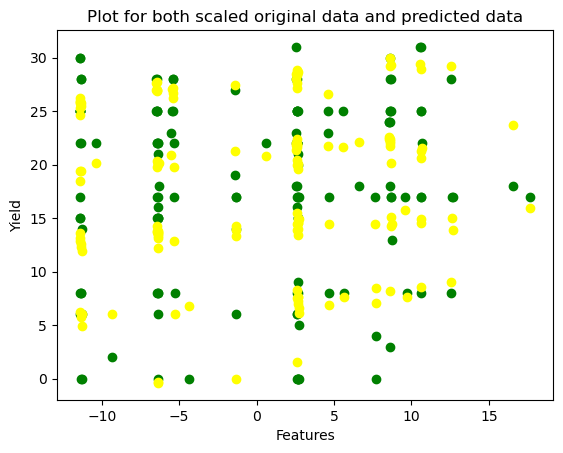

In [41]:
plt.scatter(x=pcr, y=new_data['Yield'], c='green')
plt.scatter(x=pcr, y=new_data['Predicted yield'], c='yellow')
plt.title('Plot for both scaled original data and predicted data')
plt.xlabel('Features')
plt.ylabel('Yield')